# """영화리뷰분류 과제"""
  1) imdb.load_data()
   * 5만개의 리뷰가 있고 이것을 50%씩 학습과 테스트용으로 분류.
   * 영화리뷰(데이터)+소감(라벨)
   * 훈련 데이터에서 빈도수가 높은 단어 순으로 되어 있으며 1만개를 사용.[0~9999]
     > load_data함수 안의 num_words=10000는 빈도수가 가장 많은 만개의 단어만을 필터링하는 기능. (단, 가장 빈도가 많은 20개는 포함하지 않음-아마도 분석에 큰 도움을 주지 못하기 때문인 것을 예상.)
     * 예를 들면 인덱스가 3인 것은 세 번째로 빈도가 높은 단어.
     * 단, 인덱스가 0인 것은 특정단어를 의미하지 않으며 알려지지 않은 단어를 위해 사용.
  > 빈도수가 낮은 단어는 무시할 것이며 이로써 적절한 크기의 벡터 데이터를 얻을 수 있음.
   * 여기서 data들은 리뷰의 목록이며[단어 인덱스의 리스트=단어시퀀스가 인코딩 됨]
          labels들은 부정(0)/긍정(1)의 리스트이다.
   즉, 입력 데이터는 벡터이고 레이블은 스칼라(1 또는 0)

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [2]:
print(len(train_data)+len(test_data))

50000


In [3]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
print(len(train_data[0]))
print(len(train_data[1]))

218
189


In [32]:
import pandas as pd
pdata = pd.DataFrame(train_data)
plabels = pd.DataFrame(train_labels)

In [34]:
len(pdata[0][0])

218

In [6]:
plabels

,0
0,1
1,0
2,0
3,1
4,0
...,...
24995,1
24996,0
24997,0
24998,1


In [7]:
max([max(sequence) for sequence in train_data])

9999

In [8]:
pd.unique(plabels[0])

array([1, 0], dtype=int64)

In [9]:
word_index = imdb.get_word_index() 
   # 워드 임베딩한 결과!(by jjm)
   # max(reverse_word_index)를 실행하면 88584가 출력됨.

In [10]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [11]:
type(word_index)

dict

In [12]:
word_index.get('they')

33

In [13]:
type(word_index)

dict

In [14]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [15]:
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
  # 0(패딩), 1(문서시작), 2(사전에 없음)을 위해 3씩 더 해져 있기 때문에 3씩을 빼주어야 한다.
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [35]:
a = []
a = [i-3 for i in train_data[0]]
a

[-2,
 11,
 19,
 13,
 40,
 527,
 970,
 1619,
 1382,
 62,
 455,
 4465,
 63,
 3938,
 1,
 170,
 33,
 253,
 2,
 22,
 97,
 40,
 835,
 109,
 47,
 667,
 -1,
 6,
 32,
 477,
 281,
 2,
 147,
 1,
 169,
 109,
 164,
 -1,
 333,
 382,
 36,
 1,
 169,
 4533,
 1108,
 14,
 543,
 35,
 10,
 444,
 1,
 189,
 47,
 13,
 3,
 144,
 2022,
 16,
 11,
 19,
 1,
 1917,
 4610,
 466,
 1,
 19,
 68,
 84,
 9,
 13,
 40,
 527,
 35,
 73,
 12,
 10,
 1244,
 1,
 19,
 14,
 512,
 14,
 9,
 13,
 623,
 15,
 -1,
 2,
 59,
 383,
 9,
 5,
 313,
 5,
 103,
 2,
 1,
 2220,
 5241,
 13,
 477,
 63,
 3782,
 30,
 1,
 127,
 9,
 13,
 35,
 616,
 2,
 22,
 121,
 48,
 33,
 132,
 45,
 22,
 1412,
 30,
 3,
 19,
 9,
 212,
 25,
 74,
 49,
 2,
 11,
 404,
 13,
 79,
 -1,
 5,
 1,
 104,
 114,
 5949,
 12,
 253,
 1,
 -1,
 4,
 3763,
 2,
 720,
 33,
 68,
 40,
 527,
 473,
 23,
 397,
 314,
 43,
 4,
 1,
 -1,
 1026,
 10,
 101,
 85,
 1,
 378,
 12,
 294,
 95,
 29,
 2068,
 53,
 23,
 138,
 3,
 191,
 7483,
 15,
 1,
 223,
 19,
 18,
 131,
 473,
 23,
 477,
 2,
 141,
 27,
 5532,
 15

In [16]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [17]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [18]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [20]:
"""1"""
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
"""
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])
"""

"\nfrom tensorflow.keras import optimizers\nmodel.compile(optimizer=optimizers.RMSprop(lr=0.001),\n             loss='binary_crossentropy',\n             metrics=['accuracy'])\n"

In [21]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=2)
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   #callbacks=[early_stopping],
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/160
15000/15000 [==============================] - 1s 88us/sample - loss: 0.5089 - acc: 0.7943 - val_loss: 0.3810 - val_acc: 0.8715
Epoch 2/160
15000/15000 [==============================] - 0s 32us/sample - loss: 0.3017 - acc: 0.9014 - val_loss: 0.3214 - val_acc: 0.8759
Epoch 3/160
15000/15000 [==============================] - 0s 32us/sample - loss: 0.2215 - acc: 0.9305 - val_loss: 0.2797 - val_acc: 0.8899
Epoch 4/160
15000/15000 [==============================] - 0s 32us/sample - loss: 0.1771 - acc: 0.9425 - val_loss: 0.2740 - val_acc: 0.8908
Epoch 5/160
15000/15000 [==============================] - 0s 32us/sample - loss: 0.1450 - acc: 0.9537 - val_loss: 0.2833 - val_acc: 0.8887
Epoch 6/160
15000/15000 [==============================] - 0s 32us/sample - loss: 0.1164 - acc: 0.9652 - val_loss: 0.2990 - val_acc: 0.8860
Epoch 7/160
15000/15000 [==============================] - 0s 32us/sample - loss: 0.0954 - acc: 0.9724 - val_l

15000/15000 [==============================] - 1s 33us/sample - loss: 3.5559e-04 - acc: 0.9999 - val_loss: 1.7363 - val_acc: 0.8565
Epoch 59/160
15000/15000 [==============================] - 1s 34us/sample - loss: 1.1686e-06 - acc: 1.0000 - val_loss: 1.7322 - val_acc: 0.8575
Epoch 60/160
15000/15000 [==============================] - 1s 34us/sample - loss: 1.0506e-06 - acc: 1.0000 - val_loss: 1.7348 - val_acc: 0.8571
Epoch 61/160
15000/15000 [==============================] - 1s 34us/sample - loss: 9.9469e-07 - acc: 1.0000 - val_loss: 1.7395 - val_acc: 0.8569
Epoch 62/160
15000/15000 [==============================] - 1s 34us/sample - loss: 9.2013e-07 - acc: 1.0000 - val_loss: 1.7503 - val_acc: 0.8570
Epoch 63/160
15000/15000 [==============================] - 1s 34us/sample - loss: 7.8853e-07 - acc: 1.0000 - val_loss: 1.7802 - val_acc: 0.8571
Epoch 64/160
15000/15000 [==============================] - 1s 34us/sample - loss: 2.6702e-04 - acc: 0.9999 - val_loss: 1.9733 - val_acc: 0.850

15000/15000 [==============================] - 0s 33us/sample - loss: 3.6693e-09 - acc: 1.0000 - val_loss: 2.5229 - val_acc: 0.8559
Epoch 115/160
15000/15000 [==============================] - 0s 33us/sample - loss: 3.6327e-09 - acc: 1.0000 - val_loss: 2.5238 - val_acc: 0.8557
Epoch 116/160
15000/15000 [==============================] - 1s 34us/sample - loss: 3.5390e-09 - acc: 1.0000 - val_loss: 2.5272 - val_acc: 0.8557
Epoch 117/160
15000/15000 [==============================] - 1s 34us/sample - loss: 3.4992e-09 - acc: 1.0000 - val_loss: 2.5312 - val_acc: 0.8556
Epoch 118/160
15000/15000 [==============================] - 1s 34us/sample - loss: 3.4564e-09 - acc: 1.0000 - val_loss: 2.5353 - val_acc: 0.8556
Epoch 119/160
15000/15000 [==============================] - 1s 34us/sample - loss: 3.4258e-09 - acc: 1.0000 - val_loss: 2.5402 - val_acc: 0.8561
Epoch 120/160
15000/15000 [==============================] - 1s 34us/sample - loss: 3.3999e-09 - acc: 1.0000 - val_loss: 2.5413 - val_acc:

In [23]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 30us/sample - loss: 2.8623 - acc: 0.8410


In [24]:
results

[2.8622626414328813, 0.841]

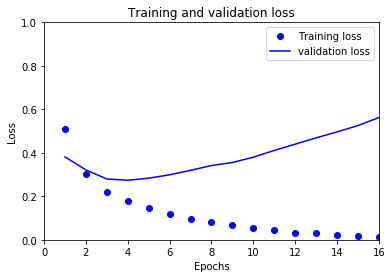

In [25]:
import matplotlib.pyplot as plt
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.axis([0, 16, 0.0, 1.0])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

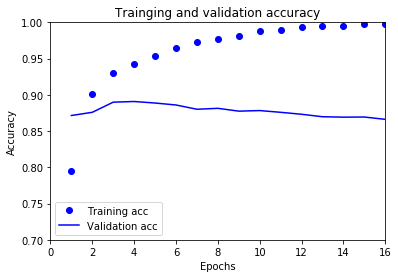

In [26]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Trainging and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.axis([0, 16, 0.7, 1.0])
plt.legend()
plt.show()

In [36]:
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in test_data[0]])
print(decoded_review)
model.predict(x_test[:1])


? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ? so all you madison fans give this a miss


array([[5.935032e-11]], dtype=float32)

In [37]:
model.predict(x_test[:3])

array([[5.9350323e-11],
       [1.0000000e+00],
       [7.5735396e-04]], dtype=float32)